# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2

In [1]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
X = faces.data
y = faces.target
print(X.data.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/mmendoza/scikit_learn_data
(400, 4096)


## Actividad en clase

Clusterice el dataset usando **HAC**. Para esto haga lo siguiente:

- Aplique minmax scaler.
- Sobre el dataset, aplique PCA reteniendo el 95% de la varianza.
- Corra HAC con inicialización random para un valor de k adecuado (justifique), para los cuatro algoritmos de aglomeración vistos en clases. 
- ¿Cuál algoritmo funcionó mejor según Silhouette score?
- Visualice el dendrograma obtenido por la mejor solución y vea que tan lejos puede llegar usando la altura máxima del árbol.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***

In [2]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Cambia 0.95 por el porcentaje de varianza deseado
X = pca.fit_transform(X)

In [4]:
X.shape

(400, 121)

In [5]:
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
hac1 = AgglomerativeClustering(linkage='single', n_clusters=40)
hac1 = hac1.fit(X)

hac2 = AgglomerativeClustering(linkage='average', n_clusters=40)
hac2 = hac2.fit(X)

hac3 = AgglomerativeClustering(linkage='complete', n_clusters=40)
hac3 = hac3.fit(X)

hac4 = AgglomerativeClustering(linkage='ward', n_clusters=40)
hac4 = hac4.fit(X)

In [6]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, hac1.labels_, metric="euclidean",))
print(silhouette_score(X, hac2.labels_, metric="euclidean",))
print(silhouette_score(X, hac3.labels_, metric="euclidean",))
print(silhouette_score(X, hac4.labels_, metric="euclidean",))

-0.015504518
0.17348547
0.17273472
0.19208404


In [7]:
from sklearn.cluster import AgglomerativeClustering

# setting distance_threshold=0 ensures we compute the full tree.
hac = AgglomerativeClustering(distance_threshold=0, linkage='ward', n_clusters=None)
hac = hac.fit(X)

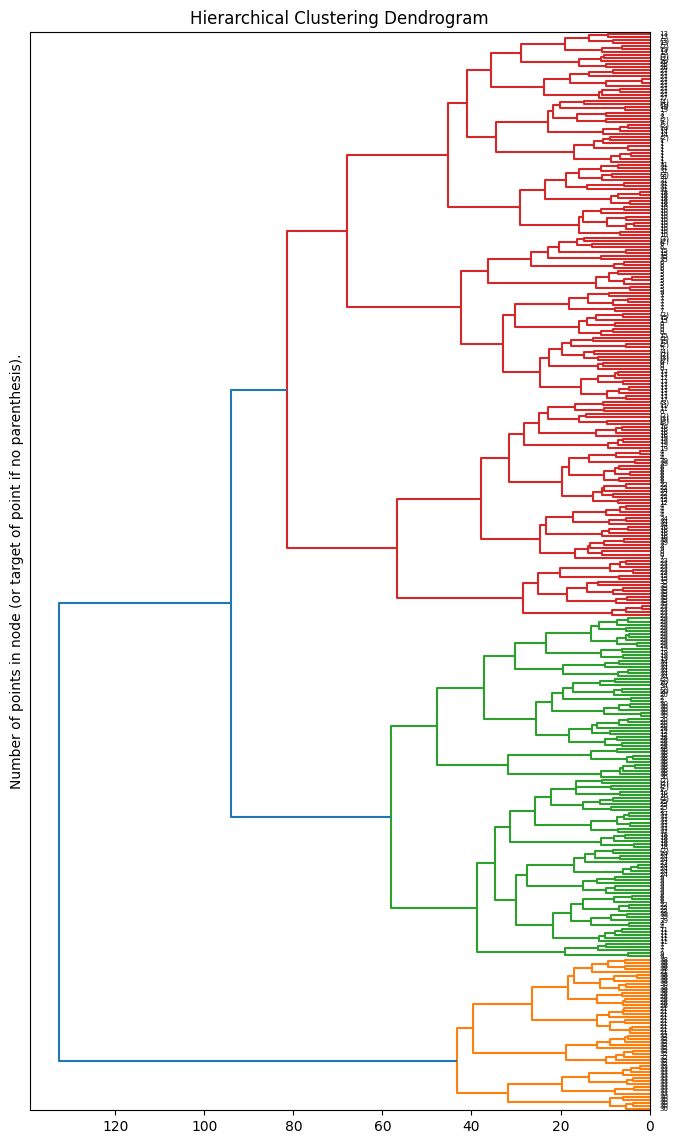

In [26]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_) # model.labels_: cluster labels for each point
    for i, merge in enumerate(model.children_): 
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples] # in-order enumeration of nodes
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(8, 14))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hac, truncate_mode="level", p=10, labels=y, orientation = 'left')
plt.ylabel("Number of points in node (or target of point if no parenthesis).")
plt.show()